In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import os
import json
from pymongo import MongoClient


client = MongoClient('mongodb://localhost:27017/')
db = client['hack']
collection = db['fakeEmployeesNew']

data = [doc for doc in collection.find({})]

df = pd.DataFrame(data)

df.head


<bound method NDFrame.head of                          _id             name             phoneNumber  \
0   64b01e9752a16c2913414b97      Stephen Kim       311.358.0941x8049   
1   64b01e9752a16c2913414b98  Michele Johnson  001-561-382-3096x68578   
2   64b01e9752a16c2913414b99    Bradley Logan            593.500.1859   
3   64b01e9752a16c2913414b9a  Tyler Walsh PhD      (938)384-5371x3807   
4   64b01e9752a16c2913414b9b     Ryan Bridges           (789)381-7306   
..                       ...              ...                     ...   
95  64b01e9752a16c2913414bf6     Wendy Nelson        746-501-8704x199   
96  64b01e9752a16c2913414bf7    Derrick Lopez    +1-600-758-6973x3213   
97  64b01e9752a16c2913414bf8  Samantha Tucker      (488)717-6588x7875   
98  64b01e9752a16c2913414bf9  Johnny Atkinson     +1-550-958-6232x682   
99  64b01e9752a16c2913414bfa     Michael Ward            450.764.8479   

              workLocation      role              jobRole  salary  \
0            Tampa,Flori

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import os
import json
from pymongo import MongoClient


client = MongoClient('mongodb://localhost:27017/')
db = client['hack']
collection = db['fakeEmployeesNew']

data = [doc for doc in collection.find({})]

df = pd.DataFrame(data)

# Dropping irrelevant data
df_model = df.drop(columns=['_id', 'name', 'phoneNumber', 'role', 'managerId'])

# One hot encode the categorical columns
df_model = pd.get_dummies(df_model, columns=['jobRole', 'workLocation'])

# Splitting Data intro Training Set and Test Set
X = df_model.drop(columns='salary')
y = df_model['salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#Initialize model
model = LinearRegression()
model.fit(X_train, y_train)

#Use model to make predictions for y

y_pred = model.predict(X_test)

#Error metrics for averages
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

mae, mse, rmse


(5203.612918043543, 43178367.773306385, 6571.024864760929)

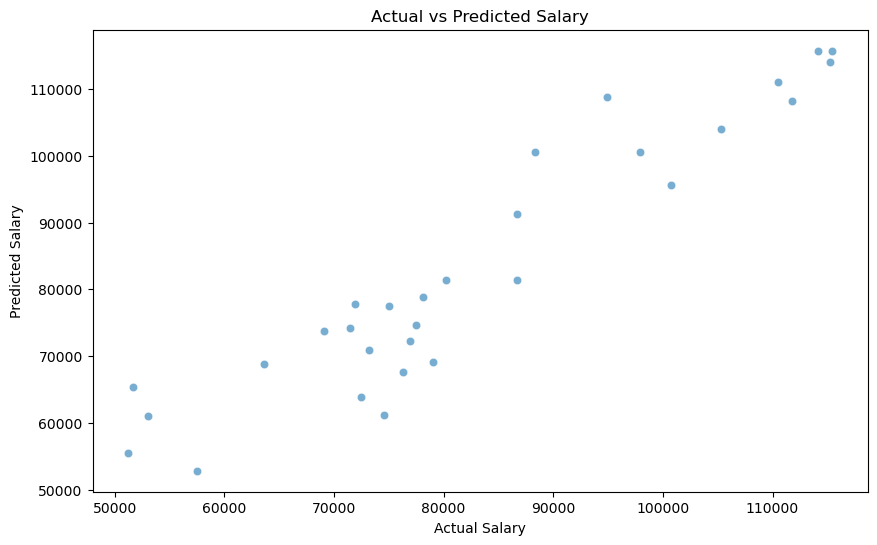

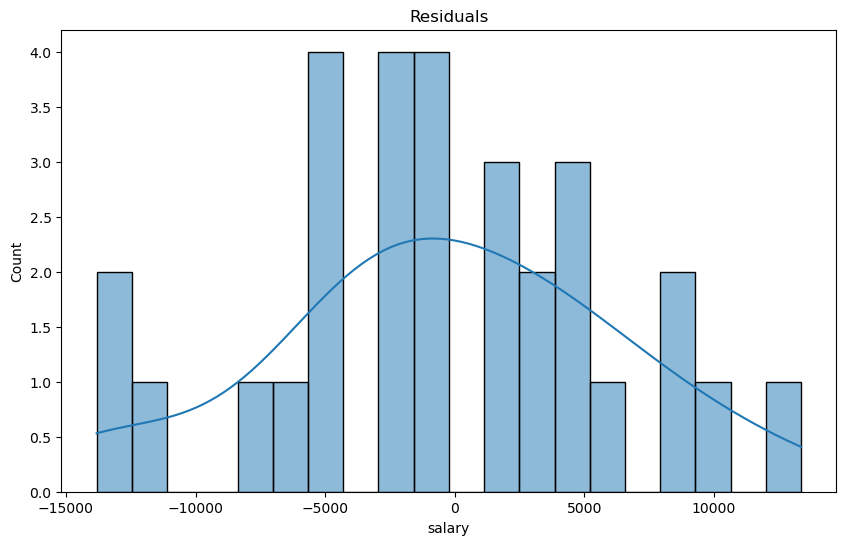

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

#Plotting actual vs predicted
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(10,6))
sns.histplot(residuals, bins=20, kde=True)
plt.title('Residuals')
plt.show()